In [15]:
import matplotlib.pyplot as plt
import skimage.io as skio
import skimage
import numpy as np
import skimage.morphology as morpho
import cv2

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


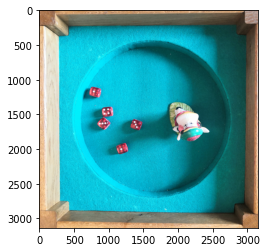

In [43]:
img = skio.imread("/content/dices2.jpg")
imhsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
rows,cols,channels=imhsv.shape
plt.imshow(img)

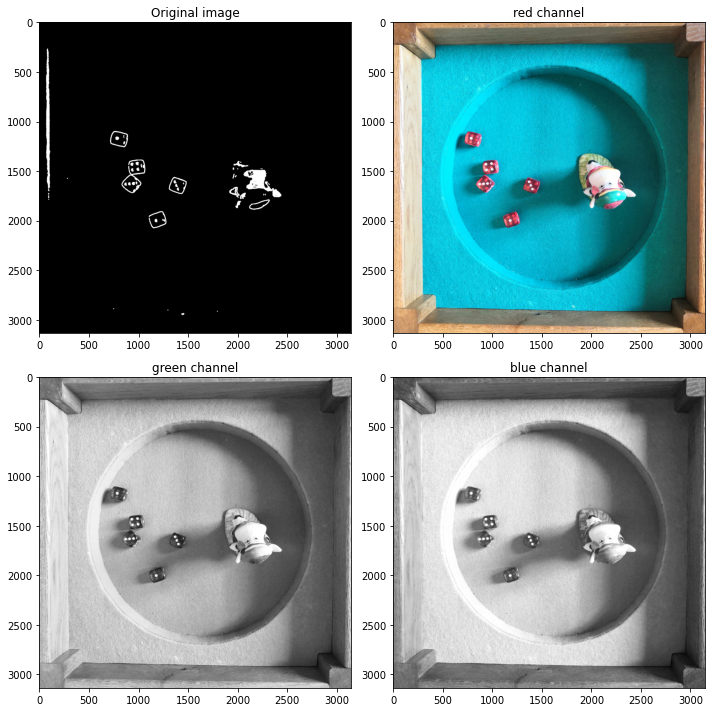

In [63]:
imred   = img[:,:,0]
imgreen = img[:,:,1]
imblue  = img[:,:,2]

low_red=np.array([0,0,46])
high_red=np.array([10,255,255])
mask1=cv2.inRange(imhsv,low_red,high_red)

low_red2=np.array([156,0,46])
high_red2=np.array([180,255,255])
mask2=cv2.inRange(imhsv,low_red2,high_red2)

mask=mask1+mask2

strell=morpho.disk(5)
mask3=morpho.dilation(mask,strell)
#image size 
[nrow,ncol,nch]=img.shape
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

#we display the images
axes[0, 0].imshow(mask3,cmap='gray')
axes[0,0].set_title('Original image')
axes[0, 1].imshow(img, cmap="gray")
axes[0,1].set_title('red channel')
axes[1, 0].imshow(imgreen, cmap="gray")
axes[1,0].set_title('green channel')
axes[1, 1].imshow(imblue, cmap="gray")
axes[1,1].set_title('blue channel')
fig.tight_layout()